In [89]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 


In [90]:
# load datasets and drop duplicate rows
test_fs=pd.read_csv('test_set_features.csv')
test_fs=test_fs.drop_duplicates()
train_fs=pd.read_csv('training_set_features.csv')
train_fs=train_fs.drop_duplicates()
respo_id=train_fs['respondent_id'].to_numpy()
# labels of vaccine if received or not, y1 and y2
train_labels=pd.read_csv('training_set_labels.csv') 
train_labels=train_labels.drop_duplicates()

In [91]:
# drop columns with more than 40% values missing
train_df=train_fs.drop(['respondent_id','health_insurance','employment_industry','employment_occupation'],axis='columns').copy()
test_df=test_fs.drop(['respondent_id','health_insurance','employment_industry','employment_occupation'],axis='columns').copy()

In [92]:
# fill nan values with mode
train_df=train_df.fillna(train_df.mode().iloc[0])
test_df=test_df.fillna(test_df.mode().iloc[0]).iloc[:26707]

In [93]:
# REPLACE object values with number ranges / [Label encoding]
age_groups = {'18 - 34 Years':1,'35 - 44 Years':2,'45 - 54 Years':3,'55 - 64 Years':4,'65+ Years':5}
train_df['age_group'] = train_df['age_group'].replace(age_groups)
test_df['age_group'] = test_df['age_group'].replace(age_groups)

edu = {'< 12 Years':0, '12 Years':1, 'College Graduate':2, 'Some College':3}
train_df['education'] = train_df['education'].replace(edu)
test_df['education'] = test_df['education'].replace(edu)

races={'White':0, 'Black':1, 'Other or Multiple':2, 'Hispanic':3}
train_df['race'] = train_df['race'].replace(races)
test_df['race'] = test_df['race'].replace(races)

sexes={'Female':0,'Male':1}
train_df['sex'] = train_df['sex'].replace(sexes)
test_df['sex'] = test_df['sex'].replace(sexes)

ipov = {'Below Poverty':0, '<= $75,000, Above Poverty':1, '> $75,000':2}
train_df['income_poverty'] = train_df['income_poverty'].replace(ipov)
test_df['income_poverty'] = test_df['income_poverty'].replace(ipov)

ms= {'Not Married':0, 'Married':1}
train_df['marital_status'] = train_df['marital_status'].replace(ms)
test_df['marital_status'] = test_df['marital_status'].replace(ms)

ro={'Own':0, 'Rent':1}
train_df['rent_or_own'] = train_df['rent_or_own'].replace(ro)
test_df['rent_or_own'] = test_df['rent_or_own'].replace(ro)

es = {'Not in Labor Force':0, 'Employed':1, 'Unemployed':2}
train_df['employment_status'] = train_df['employment_status'].replace(es)
test_df['employment_status'] = test_df['employment_status'].replace(es)

hgeo={'oxchjgsf':0, 'bhuqouqj':1, 'qufhixun':2, 'lrircsnp':3, 'atmpeygn':4,'lzgpxyit':5, 
      'fpwskwrf':6, 'mlyzmhmf':7, 'dqpwygqj':8, 'kbazzjca':9}
train_df['hhs_geo_region'] = train_df['hhs_geo_region'].replace(hgeo)
test_df['hhs_geo_region'] = test_df['hhs_geo_region'].replace(hgeo)

msas = {'Non-MSA':0, 'MSA, Not Principle  City':1, 'MSA, Principle City':2}
train_df['census_msa'] = train_df['census_msa'].replace(msas)
test_df['census_msa'] = test_df['census_msa'].replace(msas)

In [94]:
# SEPARATE data into xyz and seasonal vaccines
# we've train_df and test_df
s1='xyz'; s2='seasonal'; s3='seas'

mask1_train = [s1 not in col for col in train_df.columns]
mask2_train = [(s2 not in col) and (s3 not in col) for col in train_df.columns]

# we get train and test for both vaccines
train_xyz = train_df.loc[:,mask2_train]
test_xyz = test_df.loc[:,mask2_train]

train_seas = train_df.loc[:,mask1_train]
test_seas = test_df.loc[:,mask1_train]

# labels(y1,y2) in train_labels which we'll split
train_y1 = train_labels.pop('xyz_vaccine')
train_y2 = train_labels.pop('seasonal_vaccine')


In [103]:
test_seas.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3,0,2,0,1,1,7,1,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,1,1,1,0,3.0,0.0
2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0,1,2,1,0,1,3,0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,1,1,0,0,3,1,1.0,0.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1,0,1,0,0,1,5,0,0.0,1.0


In [99]:
# splitting data into train and test
train_x1, test_x1, train_xyz_y, test_xyz_y = train_test_split(train_xyz, train_y1, 
                                                              test_size=0.30, random_state=42) 
train_x2, test_x2, train_seas_y, test_seas_y = train_test_split(train_seas, train_y2, 
                                                              test_size=0.30, random_state=42) 
# standardize the X sets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_x1 = scaler.fit_transform(train_x1)
test_x1 = scaler.transform(test_x1)
train_x2 = scaler.fit_transform(train_x2)
test_x2 = scaler.transform(test_x2)

In [100]:
#Import svm Library
from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [106]:
# Create Linear SVM object
support1 = svm.LinearSVC(random_state=20)
support2 = svm.LinearSVC(random_state=20)


# Train the model using the training sets and check score on test dataset
support1.fit(train_x1, train_xyz_y)
predicted1= support1.predict(test_x1)
score1=accuracy_score(test_xyz_y,predicted1)

support2.fit(train_x2, train_seas_y)
predicted2= support2.predict(test_x2)
score2=accuracy_score(test_seas_y,predicted2)

print("Your Model Accuracy is", [score1,score2])

Your Model Accuracy is [0.8327717459128916, 0.7791089479595658]


In [107]:
# Calibrate the model support 
from sklearn.calibration import CalibratedClassifierCV
calib_sup1 = CalibratedClassifierCV(support1,method='isotonic',cv=5)
calib_sup2 = CalibratedClassifierCV(support2,method='isotonic',cv=5)

calib_sup1.fit(train_x1,train_xyz_y)
calib_sup2.fit(train_x2,train_seas_y)

# make predictions on test data
xyz_pred = calib_sup1.predict(test_x1)
xyz_pred_prob = calib_sup1.predict_proba(test_x1)[:,1]
seas_pred = calib_sup2.predict(test_x2)
seas_pred_prob = calib_sup2.predict_proba(test_x2)[:,1]


In [111]:
hackathon_output= pd.DataFrame({'column1':xyz_pred_prob*100,'column2':seas_pred_prob*100})
hackathon_output.columns=['xyz_vaccine(in%)','seas_vaccine(in %()']
hackathon_output.to_csv('ha)ckathon_output.csv',index=False)

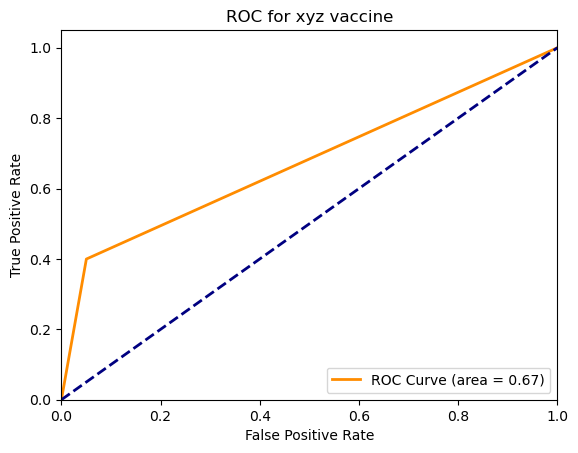

In [114]:
# roc-auc 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr1,tpr1,_=roc_curve(test_xyz_y,xyz_pred)
roc_auc1=auc(fpr1,tpr1)

plt.plot(fpr1,tpr1,color='darkorange',lw=2,label='ROC Curve (area = %0.2f)' % roc_auc1)
plt.plot([0,1],[0,1], color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for xyz vaccine')
plt.legend(loc="lower right")




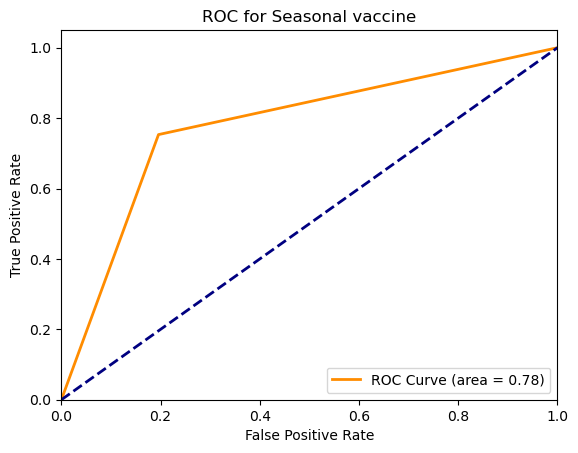

In [115]:
fpr2,tpr2,_=roc_curve(test_seas_y,seas_pred)
roc_auc2=auc(fpr2,tpr2)

plt.plot(fpr2,tpr2,color='darkorange',lw=2,label='ROC Curve (area = %0.2f)' % roc_auc2)
plt.plot([0,1],[0,1], color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Seasonal vaccine')
plt.legend(loc="lower right")